In [2]:
from zipfile import ZipFile

file_name = 'compressed.zip'

with ZipFile(file_name, 'r') as f:
  f.extractall()
  print("Done")

Done


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import sklearn.metrics as metrics
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import VGG16

In [4]:
import cv2
import imghdr
import os
import numpy as np
from matplotlib import pyplot as plt

In [5]:
rmdir data/.ipynb_checkpoints

rmdir: failed to remove 'data/.ipynb_checkpoints': No such file or directory


In [6]:
data_dir = 'data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir): 
    print(image_class)
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

white_knight
black_knight
empty
white_pawn
black_queen
white_queen
white_king
black_pawn
white_rook
black_bishop
white_bishop
black_king
black_rook


In [7]:
data = tf.keras.utils.image_dataset_from_directory('data')


Found 3167 files belonging to 13 classes.


In [8]:
data_iterator = data.as_numpy_iterator()

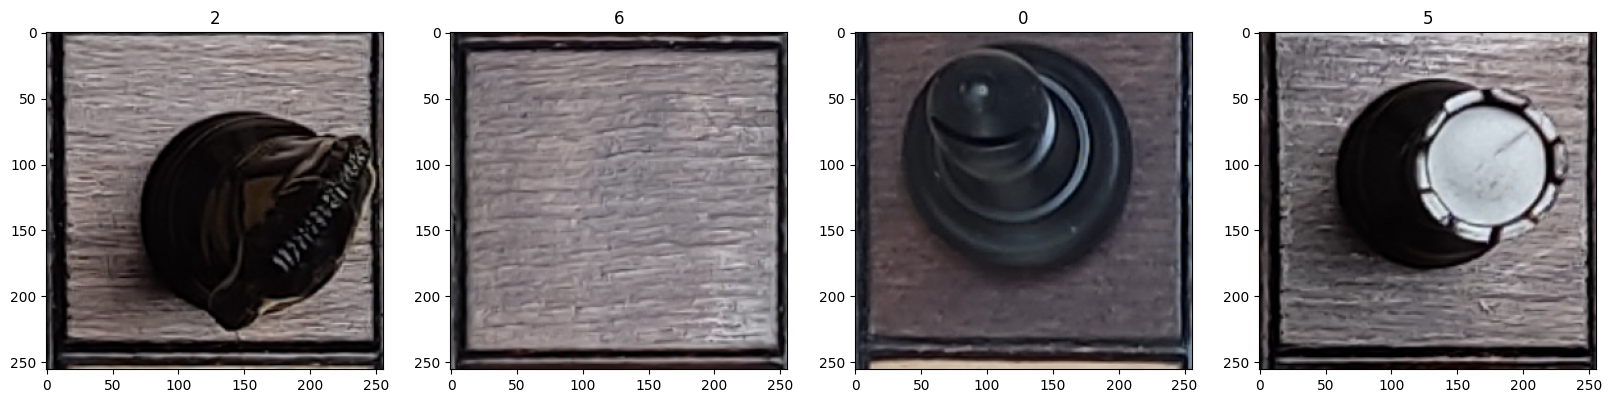

In [9]:
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [10]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.23921569, 0.23529412, 0.25490198],
          [0.31479013, 0.31086856, 0.3304764 ],
          [0.40710783, 0.40318626, 0.4227941 ],
          ...,
          [0.0171492 , 0.01322764, 0.03675705],
          [0.09365043, 0.08972886, 0.11325827],
          [0.21960784, 0.21568628, 0.23921569]],
 
         [[0.2140242 , 0.2078125 , 0.22284007],
          [0.29762307, 0.29141137, 0.30911374],
          [0.3977639 , 0.39225447, 0.4118623 ],
          ...,
          [0.01345457, 0.01112089, 0.03306241],
          [0.08945483, 0.08687066, 0.10810994],
          [0.21273744, 0.20881587, 0.23005515]],
 
         [[0.17804074, 0.1701976 , 0.18196231],
          [0.27227172, 0.2644286 , 0.2793691 ],
          [0.38333112, 0.37632176, 0.3935246 ],
          ...,
          [0.01091891, 0.00888262, 0.03015801],
          [0.08816877, 0.08583508, 0.10614518],
          [0.21024816, 0.20632659, 0.22593443]],
 
         ...,
 
         [[0.20815717, 0.15566023, 0.15566023],
          [0.20675

In [11]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2) + 1
test_size = int(len(data)*.1) + 1


In [12]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [13]:
vgg = VGG16(input_shape = (256,256,3), weights = "imagenet", include_top = False)
for layer in vgg.layers:
 layer.trainable = False
x = Flatten()(vgg.output)
x = Dense(128, activation = "relu")(x) 
x = Dense(64, activation = "relu")(x) 
x = Dense(13, activation = "softmax")(x) 

model = Model(inputs = vgg.input, outputs = x)
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
batch_size = 32
epochs = 10
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True,verbose=1)

model.fit_generator(train, validation_data=val, epochs=epochs, verbose=1, callbacks=[early_stopping_cb])
print("Training Completed!")

Epoch 1/10


<ipython-input-14-3b9c788fc953>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train, validation_data=val, epochs=epochs, verbose=1, callbacks=[early_stopping_cb])


17/69 [======>.......................] - ETA: 19:37 - loss: 2.9310 - accuracy: 0.1710